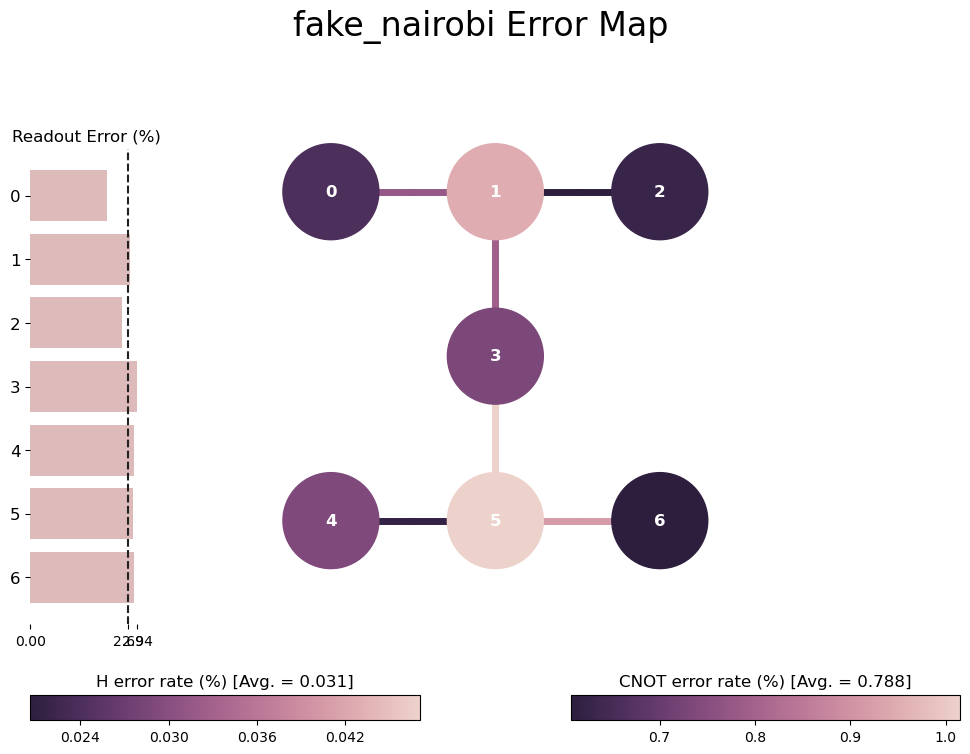

In [17]:
from qiskit import QuantumCircuit, execute
from qiskit.providers.fake_provider import FakeNairobi
from qiskit.visualization import plot_error_map

backend = FakeNairobi()

plot_error_map(backend)

In [18]:
config = backend.configuration()
print("This backend is called {0}, and is on version {1}. It has {2} qubit{3}. It "
      "{4} OpenPulse programs. The basis gates supported on this device are {5}."
      "".format(config.backend_name,
                config.backend_version,
                config.n_qubits,
                '' if config.n_qubits == 1 else 's',
                'supports' if config.open_pulse else 'does not support',
                config.basis_gates))
props = backend.properties()
def describe_qubit(qubit, properties):
    """Print a string describing some of reported properties of the given qubit."""

    # Conversion factors from standard SI units
    us = 1e6
    ns = 1e9
    GHz = 1e-9

    print("Qubit {0} has a \n"
          "  - T1 time of {1} microseconds\n"
          "  - T2 time of {2} microseconds\n"
          "  - U2 gate error of {3}\n"
          "  - U2 gate duration of {4} nanoseconds\n"
          "  - resonant frequency of {5} GHz".format(
              qubit,
              properties.t1(qubit) * us,
              properties.t2(qubit) * us,
              properties.gate_error('sx', qubit),
              properties.gate_length('sx', qubit) * ns,
              properties.frequency(qubit) * GHz))
    
n_qubits = config.n_qubits
for i in range(n_qubits):
    describe_qubit(i, props)

This backend is called fake_nairobi, and is on version 1.0.13. It has 7 qubits. It supports OpenPulse programs. The basis gates supported on this device are ['id', 'rz', 'sx', 'x', 'cx', 'reset'].
Qubit 0 has a 
  - T1 time of 209.26307583699622 microseconds
  - T2 time of 51.356207758388386 microseconds
  - U2 gate error of 0.0002409827161319061
  - U2 gate duration of 35.55555555555556 nanoseconds
  - resonant frequency of 5.260483791030156 GHz
Qubit 1 has a 
  - T1 time of 109.68501080336374 microseconds
  - T2 time of 135.26831435320162 microseconds
  - U2 gate error of 0.00042630736355316545
  - U2 gate duration of 35.55555555555556 nanoseconds
  - resonant frequency of 5.170333454748703 GHz
Qubit 2 has a 
  - T1 time of 137.09323422858205 microseconds
  - T2 time of 168.29289411620812 microseconds
  - U2 gate error of 0.0002203290287725651
  - U2 gate duration of 35.55555555555556 nanoseconds
  - resonant frequency of 5.274436548447223 GHz
Qubit 3 has a 
  - T1 time of 122.159013

In [7]:
from qiskit import QuantumCircuit, transpile, Aer, execute
import matplotlib.pyplot as plt
import random
import pandas as pd
import numpy as np
from qiskit.quantum_info import DensityMatrix
import pickle #For exporting the variables
from tqdm import tqdm

from qiskit import QuantumCircuit
from qiskit.providers.fake_provider import FakePerth
from qiskit import transpile
from qiskit.tools.visualization import plot_histogram
from qiskit.providers.ibmq import IBMQ
from qiskit.providers.aer import AerSimulator

In [8]:
IBMQ.delete_account()
print(IBMQ.active_account())

None


In [9]:
IBMQ.save_account("87702973231459fc9d5e341987cc22103b9dc42f76ef6bce251fc0205e80b2b947da639ca062a8af16b1d2096b4c8ca1250861a96d7d21395fcd67728bf0df89", overwrite=True)

In [11]:
provider = IBMQ.load_account()

ibmqfactory.load_account:WARNING:2023-10-17 15:03:31,101: Credentials are already in use. The existing account in the session will be replaced.


In [12]:
backend2 = provider.get_backend('ibm_nairobi')


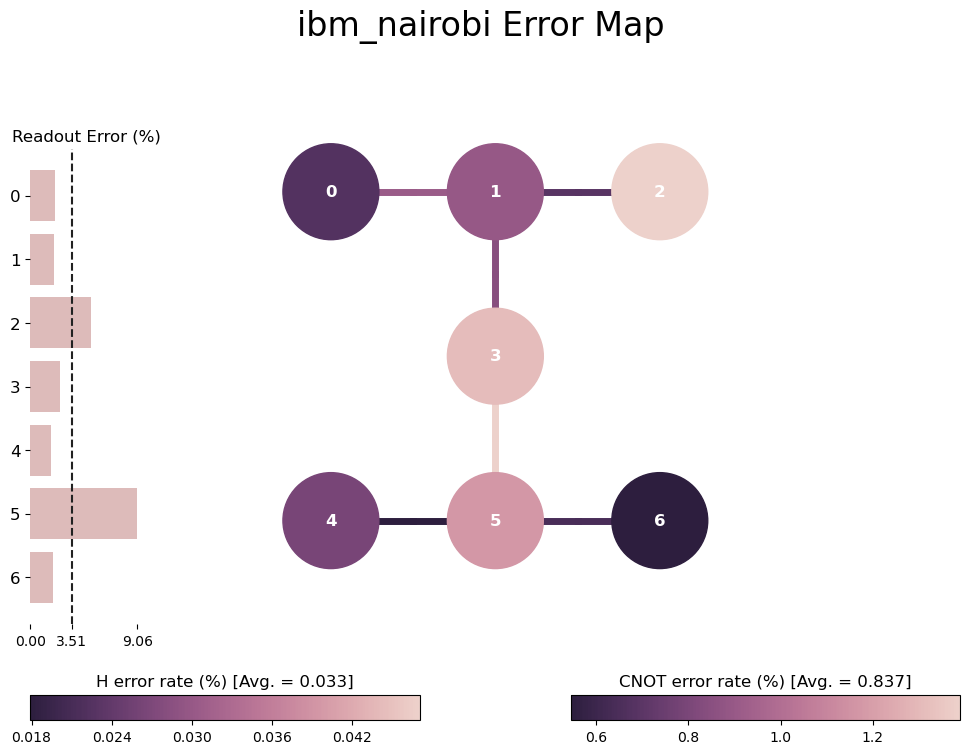

In [14]:
plot_error_map(backend2)

In [16]:
config = backend2.configuration()
print("This backend is called {0}, and is on version {1}. It has {2} qubit{3}. It "
      "{4} OpenPulse programs. The basis gates supported on this device are {5}."
      "".format(config.backend_name,
                config.backend_version,
                config.n_qubits,
                '' if config.n_qubits == 1 else 's',
                'supports' if config.open_pulse else 'does not support',
                config.basis_gates))
props = backend2.properties()
def describe_qubit(qubit, properties):
    """Print a string describing some of reported properties of the given qubit."""

    # Conversion factors from standard SI units
    us = 1e6
    ns = 1e9
    GHz = 1e-9

    print("Qubit {0} has a \n"
          "  - T1 time of {1} microseconds\n"
          "  - T2 time of {2} microseconds\n"
          "  - U2 gate error of {3}\n"
          "  - U2 gate duration of {4} nanoseconds\n"
          "  - resonant frequency of {5} GHz".format(
              qubit,
              properties.t1(qubit) * us,
              properties.t2(qubit) * us,
              properties.gate_error('sx', qubit),
              properties.gate_length('sx', qubit) * ns,
              properties.frequency(qubit) * GHz))
    
n_qubits = config.n_qubits
for i in range(n_qubits):
    describe_qubit(i, props)

This backend is called ibm_nairobi, and is on version 1.3.3. It has 7 qubits. It does not support OpenPulse programs. The basis gates supported on this device are ['id', 'rz', 'sx', 'x', 'cx', 'reset'].
Qubit 0 has a 
  - T1 time of 108.82651424261462 microseconds
  - T2 time of 38.85665968481486 microseconds
  - U2 gate error of 0.00022252256662482595
  - U2 gate duration of 35.55555555555556 nanoseconds
  - resonant frequency of 5.260487092820355 GHz
Qubit 1 has a 
  - T1 time of 121.94234898508337 microseconds
  - T2 time of 81.61974605225741 microseconds
  - U2 gate error of 0.00030043606049255276
  - U2 gate duration of 35.55555555555556 nanoseconds
  - resonant frequency of 5.170443956049304 GHz
Qubit 2 has a 
  - T1 time of 126.61072049929129 microseconds
  - T2 time of 141.42077789240082 microseconds
  - U2 gate error of 0.00047066204868944267
  - U2 gate duration of 35.55555555555556 nanoseconds
  - resonant frequency of 5.274334871202107 GHz
Qubit 3 has a 
  - T1 time of 120.